In [110]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

# HYPERPARAMETER TUNNING

## No layer

In [111]:
path = '/home/mr1142/Documents/Data/models/neumonia/ht/train_max_completo.csv'
df = pd.read_csv(path)

In [112]:
df.sort_values('val_auc')

,name,modelo,fine,batch,lr,mask,pixels,loss,binary_accuracy,precision,auc,val_loss,val_binary_accuracy,val_precision,val_auc
3,ht,EffNet3,0.866730,8,0.000822,True,512,1.424052,0.666668,0.454545,0.507735,1.129564,0.666667,0.000000,0.503333
5,ht,EffNet3,0.866730,8,0.000822,True,512,1.431295,0.666668,0.500000,0.510612,1.217522,0.666667,0.325000,0.506250
94,ht,EffNet3,0.834706,8,0.000917,False,512,1.491474,0.666668,0.500000,0.508908,1.103766,0.666667,0.000000,0.507500
338,ht,Xception,0.000042,8,0.000394,True,512,1.142894,0.666668,0.277778,0.507822,1.101959,0.666667,0.000000,0.509167
110,ht,Xception,0.078796,8,0.000529,True,512,1.155385,0.666668,0.090909,0.498036,1.103176,0.666667,0.000000,0.511667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,ht,Xception,0.408135,8,0.000853,False,512,0.806338,0.967361,0.951606,0.990806,0.795556,0.923889,0.887772,0.968019
159,ht,Xception,0.800797,8,0.000912,False,512,0.814489,0.977500,0.966639,0.994631,0.642444,0.908333,0.864322,0.968069
126,ht,EffNet3,0.222946,8,0.000526,False,512,1.228083,0.952917,0.933165,0.987353,0.821620,0.919445,0.881072,0.968188
151,ht,IncResNet,0.397672,8,0.000184,False,512,0.882482,0.972083,0.958698,0.994262,0.691697,0.915000,0.874372,0.969901


In [69]:
len(df)/3

129.0

## Layer

In [70]:
path = '/home/mr1142/Documents/Data/models/neumonia/ht/train_max_completo_layer.csv'
df = pd.read_csv(path)

In [71]:
df.sort_values('val_auc')

,name,modelo,fine,batch,lr,mask,pixels,loss,binary_accuracy,precision,auc,val_loss,val_binary_accuracy,val_precision,val_auc
47,ht,Xception,0.489997,8,0.000923,True,512,1.190662,0.666668,0.394737,0.519318,1.105652,0.666667,0.000000,0.502500
17,ht,EffNet3,0.426253,8,0.000858,True,512,1.704176,0.666946,0.571429,0.512481,1.112323,0.666667,0.000000,0.505806
154,ht,EffNet3,0.890580,8,0.000237,False,512,1.413536,0.665834,0.425000,0.513133,1.185325,0.666667,0.000000,0.506667
169,ht,Xception,0.512971,8,0.000892,False,512,1.139481,0.666668,0.293103,0.515596,1.111964,0.666667,0.000000,0.507500
105,ht,EffNet3,0.582184,8,0.000938,True,512,1.887548,0.666668,0.367299,0.511654,1.115111,0.666667,0.000000,0.515833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,ht,EffNet3,0.072540,8,0.000176,False,512,1.074574,0.963750,0.948804,0.992040,1.108876,0.917222,0.876461,0.965517
19,ht,EffNet3,0.013841,8,0.000060,True,512,0.963064,0.981528,0.972489,0.996301,1.275989,0.911667,0.869347,0.966585
20,ht,EffNet3,0.013841,8,0.000060,True,512,0.979768,0.976111,0.964167,0.996690,1.194279,0.907222,0.861436,0.967849
80,ht,IncResNet,0.301840,8,0.000108,True,512,0.947846,0.985972,0.979158,0.997293,1.453616,0.925556,0.888333,0.969608


In [72]:
len(df)/3

61.666666666666664

## PREDICTION

## No layer

In [113]:
path = '/home/mr1142/Documents/Data/models/neumonia/ht/prediction_validation_metrics_completo.csv'
df = pd.read_csv(path)

In [114]:
df['auc_mean'] = (df.auc_0 + df.auc_1 + df.auc_2)/3
df['f1_score_mean'] = (df.f1_score_0 + df.f1_score_1 + df.f1_score_2)/3

In [123]:
grouped = df.groupby(['backbone', 'frozen_prop', 'lr', 'mask']).agg({'auc_0': ['mean'], 'auc_mean': ['mean'], 'f1_score_mean': ['mean']})
grouped = grouped.reset_index()

In [126]:
grouped.sort_values(('f1_score_mean', 'mean'))

,backbone,frozen_prop,lr,mask,auc_0,auc_mean,f1_score_mean
,,,,,mean,mean,mean
35,EffNet3,0.985181,0.000220,True,0.613467,0.546329,0.411111
36,EffNet3,0.999988,0.000507,False,0.404846,0.474271,0.411111
33,EffNet3,0.866730,0.000822,True,0.583559,0.557601,0.411111
0,EffNet3,0.000004,0.000876,True,0.855147,0.750049,0.549128
32,EffNet3,0.834706,0.000917,False,0.677912,0.648561,0.580888
...,...,...,...,...,...,...,...
89,Xception,0.236592,0.000157,False,0.997795,0.990214,0.958100
108,Xception,0.644760,0.000249,True,0.996847,0.991372,0.958596
8,EffNet3,0.126282,0.000061,False,0.998159,0.990566,0.961333


In [75]:
df.columns

Index(['backbone', 'frozen_prop', 'batch', 'lr', 'mask', 'pix', 'auc_0',
       'younden_0', 'pr_max_0', 'pr_cut_0', 'auc_1', 'younden_1', 'pr_max_1',
       'pr_cut_1', 'auc_2', 'younden_2', 'pr_max_2', 'pr_cut_2', 'f1_score_0',
       'precision_score_0', 'recall_score_0', 'accuracy_score_0', 'f1_score_1',
       'precision_score_1', 'recall_score_1', 'accuracy_score_1', 'f1_score_2',
       'precision_score_2', 'recall_score_2', 'accuracy_score_2',
       'f1_score[0, 1]', 'precision_score[0, 1]', 'recall_score[0, 1]',
       'accuracy_score[0, 1]', 'f1_score[0, 2]', 'precision_score[0, 2]',
       'recall_score[0, 2]', 'accuracy_score[0, 2]', 'f1_score[1, 2]',
       'precision_score[1, 2]', 'recall_score[1, 2]', 'accuracy_score[1, 2]',
       'auc_mean', 'f1_score_mean'],
      dtype='object')

In [76]:
print(np.mean(df.auc_mean))
np.mean(df.f1_score_mean)

0.9411016345822567


0.8848838223503919

In [77]:
df.sort_values('auc_0')

,backbone,frozen_prop,batch,lr,mask,pix,auc_0,younden_0,pr_max_0,pr_cut_0,...,"f1_score[0, 2]","precision_score[0, 2]","recall_score[0, 2]","accuracy_score[0, 2]","f1_score[1, 2]","precision_score[1, 2]","recall_score[1, 2]","accuracy_score[1, 2]",auc_mean,f1_score_mean
6,EffNet3,0.922894,8,0.000364,False,512,0.145331,1.334598,0.334591,0.334597,...,0.166667,0.111111,0.333333,0.333333,0.166667,0.111111,0.333333,0.333333,0.406957,0.411111
297,EffNet3,0.999988,8,0.000507,False,512,0.211749,0.326752,0.323936,0.325615,...,0.533333,0.444444,0.666667,0.666667,0.533333,0.444444,0.666667,0.666667,0.398471,0.411111
331,EffNet3,0.747746,8,0.000380,True,512,0.252812,1.352566,0.352462,0.352545,...,0.533333,0.444444,0.666667,0.666667,0.166667,0.111111,0.333333,0.333333,0.334932,0.411111
357,EffNet3,0.740557,8,0.000909,False,512,0.281948,0.326459,0.324817,0.326552,...,0.166667,0.111111,0.333333,0.333333,0.166667,0.111111,0.333333,0.333333,0.382288,0.411111
4,EffNet3,0.866730,8,0.000822,True,512,0.399768,0.324922,0.324177,0.324605,...,0.166667,0.111111,0.333333,0.333333,0.533333,0.444444,0.666667,0.666667,0.457260,0.411111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Xception,0.396572,8,0.000069,False,512,0.998795,0.435411,0.656074,0.611910,...,0.715203,0.843586,0.711333,0.711333,0.959056,0.961061,0.958667,0.958667,0.993782,0.965677
205,Xception,0.396572,8,0.000069,False,512,0.998853,0.227122,0.337960,0.322247,...,0.816661,0.874755,0.811333,0.811333,0.970630,0.970617,0.970667,0.970667,0.995025,0.976017
152,IncResNet,0.397672,8,0.000184,False,512,0.998981,0.119404,0.119404,0.462701,...,0.695353,0.837670,0.692667,0.692667,0.971191,0.971403,0.971333,0.971333,0.996128,0.973570
284,Xception,0.759652,8,0.000112,False,512,0.999015,0.497790,0.497790,0.600275,...,0.699237,0.839293,0.696333,0.696333,0.914827,0.927527,0.913000,0.913000,0.992955,0.957153


In [78]:
no_layer = df

## Layer

In [79]:
path = '/home/mr1142/Documents/Data/models/neumonia/ht/prediction_validation_metrics_completo_layer.csv'
df = pd.read_csv(path)

In [80]:
df['auc_mean'] = (df.auc_0 + df.auc_1 + df.auc_2)/3
df['f1_score_mean'] = (df.f1_score_0 + df.f1_score_1 + df.f1_score_2)/3

In [81]:
df.columns

Index(['backbone', 'frozen_prop', 'batch', 'lr', 'mask', 'pix', 'auc_0',
       'younden_0', 'pr_max_0', 'pr_cut_0', 'auc_1', 'younden_1', 'pr_max_1',
       'pr_cut_1', 'auc_2', 'younden_2', 'pr_max_2', 'pr_cut_2', 'f1_score_0',
       'precision_score_0', 'recall_score_0', 'accuracy_score_0', 'f1_score_1',
       'precision_score_1', 'recall_score_1', 'accuracy_score_1', 'f1_score_2',
       'precision_score_2', 'recall_score_2', 'accuracy_score_2',
       'f1_score[0, 1]', 'precision_score[0, 1]', 'recall_score[0, 1]',
       'accuracy_score[0, 1]', 'f1_score[0, 2]', 'precision_score[0, 2]',
       'recall_score[0, 2]', 'accuracy_score[0, 2]', 'f1_score[1, 2]',
       'precision_score[1, 2]', 'recall_score[1, 2]', 'accuracy_score[1, 2]',
       'auc_mean', 'f1_score_mean'],
      dtype='object')

In [82]:
print(np.mean(df.auc_mean))
np.mean(df.f1_score_mean)

0.9305748257168459


0.8698015093927285

In [83]:
df.sort_values('auc_0')

,backbone,frozen_prop,batch,lr,mask,pix,auc_0,younden_0,pr_max_0,pr_cut_0,...,"f1_score[0, 2]","precision_score[0, 2]","recall_score[0, 2]","accuracy_score[0, 2]","f1_score[1, 2]","precision_score[1, 2]","recall_score[1, 2]","accuracy_score[1, 2]",auc_mean,f1_score_mean
102,EffNet3,0.582184,8,0.000938,True,512,0.212834,1.338074,0.337621,0.338011,...,0.533333,0.444444,0.666667,0.666667,0.533333,0.444444,0.666667,0.666667,0.398498,0.411111
167,Xception,0.512971,8,0.000892,False,512,0.500000,1.326583,0.326583,0.000000,...,0.166667,0.111111,0.333333,0.333333,0.166667,0.111111,0.333333,0.333333,0.500000,0.411111
159,Xception,0.315887,8,0.000264,True,512,0.500000,1.318556,0.318556,0.000000,...,0.166667,0.111111,0.333333,0.333333,0.166667,0.111111,0.333333,0.333333,0.500000,0.411111
49,Xception,0.696903,8,0.000994,True,512,0.500000,1.367690,0.367690,0.000000,...,0.533333,0.444444,0.666667,0.666667,0.166667,0.111111,0.333333,0.333333,0.500000,0.411111
48,Xception,0.696903,8,0.000994,True,512,0.500000,1.282278,0.282278,0.000000,...,0.166667,0.111111,0.333333,0.333333,0.533333,0.444444,0.666667,0.666667,0.500000,0.411111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Xception,0.897798,8,0.000934,False,512,0.998336,0.193420,0.648199,0.674472,...,0.695936,0.835374,0.693000,0.693000,0.930919,0.934413,0.932333,0.932333,0.985539,0.943476
100,IncResNet,0.155514,8,0.000676,False,512,0.998500,0.826673,0.826673,0.855554,...,0.744339,0.847448,0.739000,0.739000,0.949104,0.950143,0.949667,0.949667,0.988335,0.951720
124,IncResNet,0.322945,8,0.000064,True,512,0.998532,0.103596,0.127751,0.209190,...,0.740166,0.852471,0.735333,0.735333,0.957418,0.959563,0.957000,0.957000,0.992819,0.960214
57,IncResNet,0.745838,8,0.000106,False,512,0.998568,0.667476,0.667476,0.721269,...,0.699473,0.828683,0.695667,0.695667,0.956025,0.956397,0.956333,0.956333,0.990457,0.959719


In [84]:
layer = df

# Plots

In [85]:
import seaborn as sns
import scipy.stats as st

In [92]:
d = no_layer
data = d[d.auc_mean > 0.7]
y = 'auc_mean'

[(0.9, 1.0)]

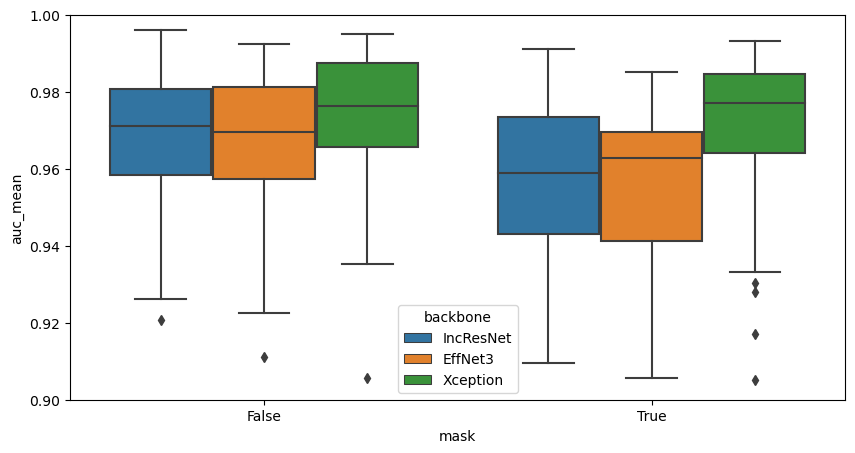

In [93]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="mask", y=y,
                hue = 'backbone',
                data=data)
p.set(ylim=(0.9, 1))

In [99]:
fig = p.get_figure()
fig.savefig("/home/mr1142/Documents/Data/plots/mask_backbone.png") 

[(0.9, 1.0)]

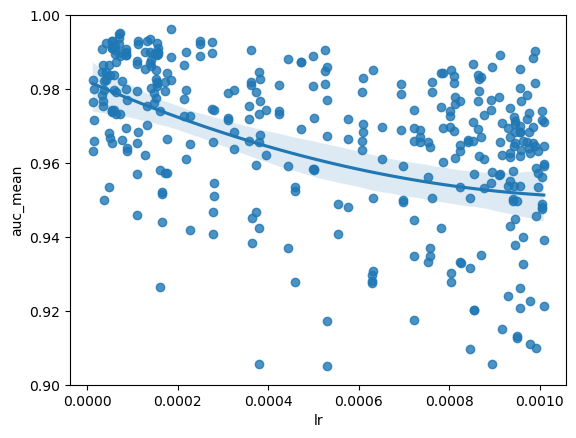

In [104]:
p = sns.regplot(x="lr", y=y,
                data=data,
                   order = 2)
p.set(ylim=(0.9, 1))

In [105]:
fig = p.get_figure()
fig.savefig("/home/mr1142/Documents/Data/plots/lr.png") 

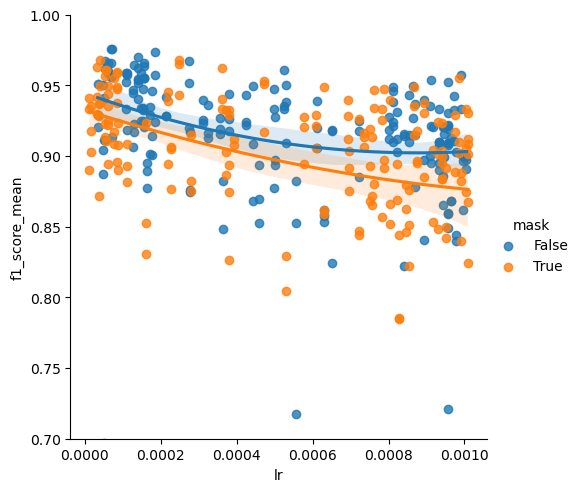

In [57]:
# plt.subplots(figsize=(10,5))
p = sns.lmplot(x="lr", y=y,
               hue= 'mask',
                data=data, order = 2)
p.set(ylim=(0.7, 1))

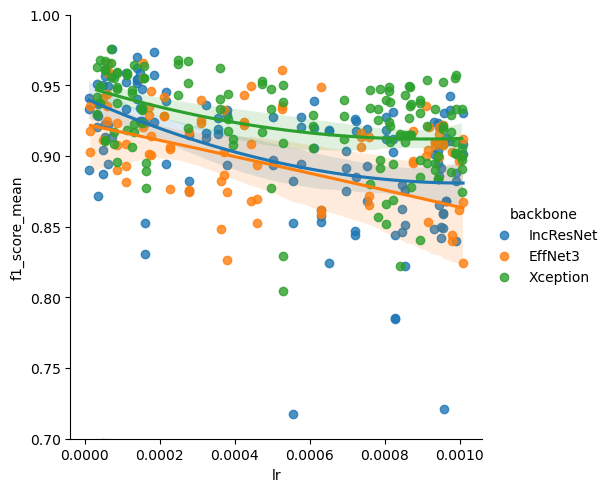

In [61]:
# plt.subplots(figsize=(10,5))
p = sns.lmplot(x="lr", y=y,
               hue= 'backbone',
                data=data, order = 2)
p.set(ylim=(0.7, 1))

[(0.9, 1.0)]

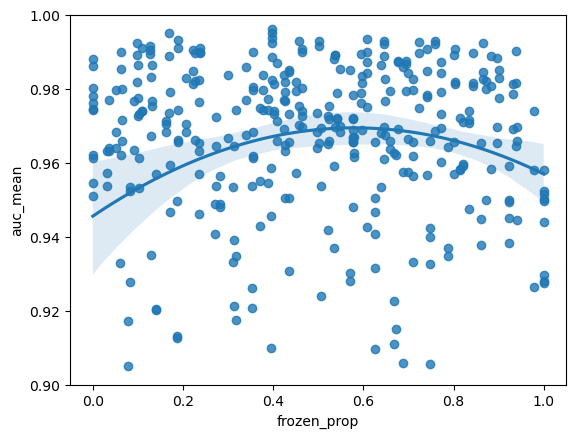

In [108]:
p = sns.regplot(x="frozen_prop", y=y,
                data=data,
                   order = 2)
p.set(ylim=(0.9, 1))

In [109]:
fig = p.get_figure()
fig.savefig("/home/mr1142/Documents/Data/plots/frozen_prop.png") 

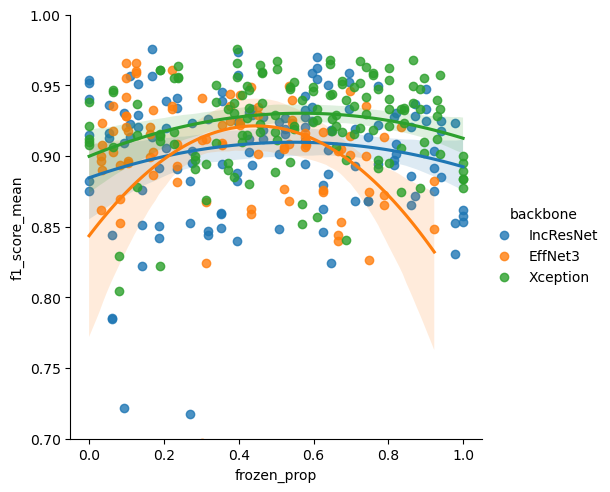

In [63]:
# plt.subplots(figsize=(10,5))
p = sns.lmplot(x="frozen_prop", y=y,
               hue= 'backbone',
                data=data, order = 2)
p.set(ylim=(0.7, 1))

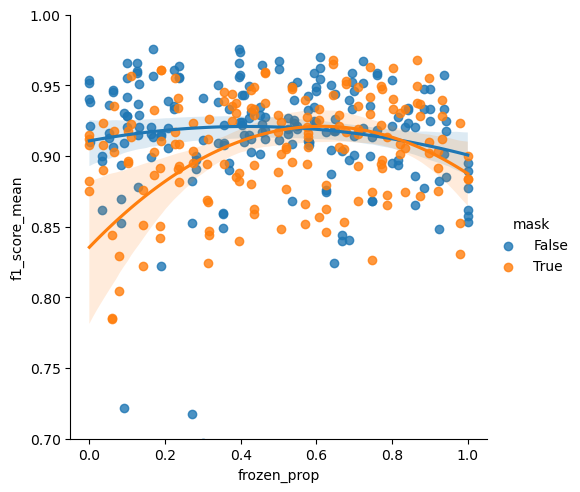

In [64]:
# plt.subplots(figsize=(10,5))
p = sns.lmplot(x="frozen_prop", y=y,
               hue= 'mask',
                data=data, order = 2)
p.set(ylim=(0.7, 1))

# Comparaciones

In [99]:
print(st.shapiro(layer.auc_mean))
print(st.shapiro(no_layer.auc_mean))

ShapiroResult(statistic=0.49194562435150146, pvalue=7.070389268451677e-23)
ShapiroResult(statistic=0.4231427311897278, pvalue=5.255143298140628e-32)


In [100]:
st.ttest_ind(layer.auc_mean[layer.backbone == 'Xception'], no_layer.auc_mean[no_layer.backbone == 'Xception'])

Ttest_indResult(statistic=-3.1848364961574, pvalue=0.0017197865815850887)

In [101]:
st.ttest_ind(layer.f1_score_mean[layer.backbone == 'Xception'], no_layer.f1_score_mean[no_layer.backbone == 'Xception'])

Ttest_indResult(statistic=-3.0605571547032935, pvalue=0.0025638083886294996)

In [102]:
st.ttest_ind(layer.auc_mean[layer.backbone == 'Xception'], layer.auc_mean[layer.backbone == 'EffNet3'])

Ttest_indResult(statistic=-0.1757507047752504, pvalue=0.8608251081370689)

In [103]:
st.ttest_ind(no_layer.auc_mean[no_layer.backbone == 'Xception'], no_layer.auc_mean[no_layer.backbone == 'EffNet3'])

Ttest_indResult(statistic=4.497773254721472, pvalue=1.09811052915134e-05)

In [104]:
st.ttest_ind(no_layer.auc_mean[no_layer['mask'] == True], no_layer.auc_mean[no_layer['mask'] == False])

Ttest_indResult(statistic=-2.0030085781185254, pvalue=0.04594708895715582)

In [105]:
st.ttest_ind(layer.auc_mean[layer['mask'] == True], layer.auc_mean[layer['mask'] == False])

Ttest_indResult(statistic=-0.9732897313604986, pvalue=0.33168709689189857)